In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [37]:
# Reading the csv file.

df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Dropping the Unnamed column as it is representing just the series.
Also Date doesn't seem favorable and we have year for time prediction.

In [38]:
# Drop Date and Unnamed columns.

df.drop(columns=['Unnamed: 0','Date'], inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [39]:
# Checking the dimension.
df.shape

(18249, 12)

In [40]:
# Checking for columns and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


In [41]:
# Encoding values type and region as part of transformation.

from sklearn.preprocessing import LabelEncoder 
le= LabelEncoder()

df['type'] = le.fit_transform(df['type'])
df['region'] = le.fit_transform(df['region'])

In [42]:
# Checking the info for transformation changes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
dtypes: float64(9), int32(2), int64(1)
memory usage: 1.5 MB


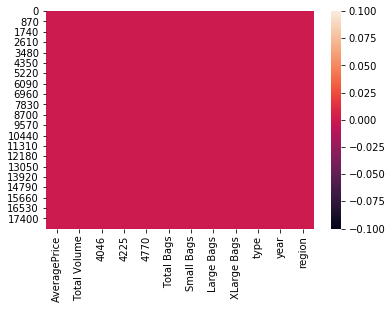

In [43]:
# Checking for null using HeatMap
sns.heatmap(df.isnull())

There are no null values in any column

In [44]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


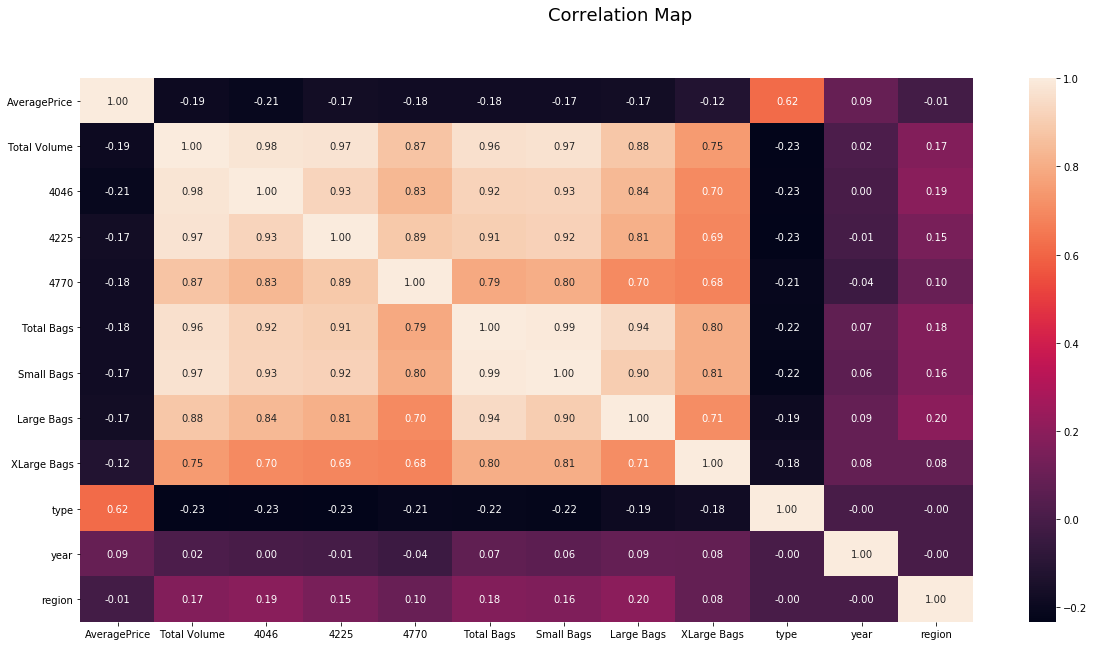

In [45]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True, fmt=".2f") 
plt.suptitle("Correlation Map", fontsize=18)
plt.show()  

The above graphs shows that the AveragePrice is having positive correlation with only type of avacados.
Also the total volume total bags have correlation between and very low compared to region and year. 

In [46]:
# Checking for skewed data
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

In [47]:
# Checking the zscore in order to normalize the data.

from scipy.stats import zscore
z= np.abs(zscore(df))
z

array([[0.18868864, 0.22771641, 0.23081597, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [0.13901962, 0.23042664, 0.23110251, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [1.18206895, 0.21208462, 0.23100731, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       ...,
       [1.15237477, 0.24233073, 0.2306933 , ..., 1.00016441, 1.97050371,
        1.70081131],
       [1.30138182, 0.24162464, 0.2304279 , ..., 1.00016441, 1.97050371,
        1.70081131],
       [0.53151208, 0.24125273, 0.22934712, ..., 1.00016441, 1.97050371,
        1.70081131]])

In [48]:
# Verifying for the presence of zscore value of data with threshold of more than 3 std score.

threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [49]:
# Removing the outliers having zscore value of more than 3.
data=df[(z<3).all(axis=1)]
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


Removed 598 records from the original data of 18249 set where zscore was more than 3 and created a new set.

In [50]:
data.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [51]:
# Reducing the skewness with boxcox1p in order to avoid 0 encountered as negative while transformation.

from scipy.special import boxcox1p
# 0 -> log transform
# .5 -> square root transform

data['Total Volume']=boxcox1p(data['Total Volume'],0.5)
data['4046']=boxcox1p(data['4046'],0.5)
data['4770']=boxcox1p(data['4770'],0.5)
data['Total Bags']=boxcox1p(data['Total Bags'],0.5)
data['Small Bags']=boxcox1p(data['Small Bags'],0.5)
data['Large Bags']=boxcox1p(data['Large Bags'],0.5)
data['XLarge Bags']=boxcox1p(data['XLarge Bags'],0.5)

In [52]:
data.skew()

AveragePrice    0.377432
Total Volume    1.963880
4046            2.497854
4225            4.455745
4770            2.646467
Total Bags      2.010776
Small Bags      2.094080
Large Bags      2.240992
XLarge Bags     3.347240
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

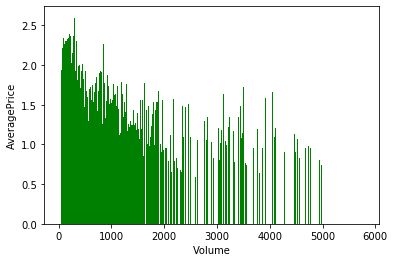

In [53]:
# Checking the relation between the Total Volumne & AveragePrice

plt.bar(data['Total Volume'], data['AveragePrice'], color='g')
plt.xlabel('Volume')
plt.ylabel('AveragePrice')
plt.show()

AveragePrice is lowered as the Volume is increased.

Text(0, 0.5, 'AveragePrice')

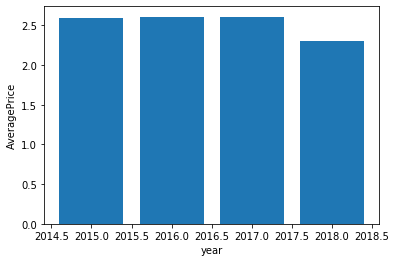

In [54]:
# Checking the relation between the Goals & Age

plt.bar(data['year'], data['AveragePrice'])
plt.xlabel('year')
plt.ylabel('AveragePrice')

In [55]:
# Setting x  by excluding AveragePrice column which is y here for prediction.
x=data.drop(['AveragePrice'],axis=1)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,504.902831,62.427944,54454.85,12.022839,184.524744,183.522182,17.416488,0.0,0,2015,0
1,466.520992,49.972300,44638.81,13.405194,193.003179,192.000722,17.848426,0.0,0,2015,0
2,685.666256,54.416310,109149.67,20.934690,178.514265,177.367890,18.409802,0.0,0,2015,0
3,560.114401,65.320131,71976.41,15.155757,150.475047,148.710318,21.217235,0.0,0,2015,0
4,449.843336,59.399674,43838.39,15.524840,155.288906,152.754774,26.191488,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,259.349039,88.508784,1529.20,0.000000,230.376161,226.629132,39.610095,0.0,1,2018,53
18245,233.703543,67.070978,3431.50,0.000000,190.518467,187.114145,34.099861,0.0,1,2018,53
18246,232.672197,67.077348,2452.79,51.997778,191.856751,191.419751,11.162067,0.0,1,2018,53
18247,252.607305,76.195396,2981.04,51.963321,207.480691,207.002775,12.282857,0.0,1,2018,53


In [56]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scale = StandardScaler()
scale = MinMaxScaler()
x=scale.fit_transform(x)

In [57]:
y=data['AveragePrice']
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

In [58]:

max_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=r_state)
    lm=LinearRegression()
    lm.fit(train_x,train_y)
    pred=lm.predict(test_x)
    score=lm.score(x,y)
    #print("Score corresponding to r_state: ",r_state," is ",score)
    if(score>max_score):
        max_score=score
        final_rstate=r_state
        
print("\n")
print("Max_accuracy_Score corresponding to final_r_state: ",final_rstate," is ",max_score)



Max_accuracy_Score corresponding to final_r_state:  93  is  0.4641962688855358


In [59]:
# Setting the test x & y values and using the random state from above step which is 83.

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=93)

In [60]:
train_x.shape

(13238, 11)

In [61]:
train_y.shape

(13238,)

In [62]:
test_x.shape

(4413, 11)

In [63]:
test_y.shape

(4413,)

# Testing out all the below model as part of LinearRegression and selecting the best from them.

In [64]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
KNN=KNeighborsRegressor(n_neighbors=10)
SV=SVR()
LR=LinearRegression()
DT=DecisionTreeRegressor(random_state=10)
LS = Lasso(alpha=0.001)
RD = Ridge(alpha=0.01)
EL = ElasticNet(alpha=0.001)
RF = RandomForestRegressor(n_estimators=200,random_state=92)
AD = AdaBoostRegressor()
GB = GradientBoostingRegressor()

In [66]:
models=[]
models.append(('KNeighborsRegressor',KNN))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DT))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EL))
models.append(('RandomForestRegressor',RF))
models.append(('AdaBoostRegressor',AD))
models.append(('GradientBoostingRegressor',GB))

In [67]:
Model=[]
score=[]
mae=[]
mse=[]
rmae=[]

for name,model in models:
    print("--------------",name,"--------------")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    
    # Metrics
    m1=mean_absolute_error(test_y,pred)
    print("Mean absolute error",m1)
    mae.append(m1)
           
    m2=mean_squared_error(test_y,pred)
    print("Mean squared error",m2)
    mse.append(m2)
    
    
    m3=np.sqrt(mean_squared_error(test_y,pred))
    print("Root Mean absolute error",m3)
    rmae.append(m3)
    
    #Model performance
    modelscore=model.score(test_x,test_y)
    print("Score: ",modelscore )
    score.append(modelscore*100)
    
    print("\n")

-------------- KNeighborsRegressor --------------
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
Mean absolute error 0.3757547850340677
Mean squared error 0.21530011940154353
Root Mean absolute error 0.4640044389890505
Score:  0.8111740562917777


-------------- SVR --------------
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Mean absolute error 0.3757547850340677
Mean squared error 0.21530011940154353
Root Mean absolute error 0.4640044389890505
Score:  0.5994691152530316


-------------- LinearRegression --------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Mean absolute error 0.3757547850340677
Mean squared error 0.21530011940154353
Root Mean absolute error 0.4640044389890505
Score:  0.46384782307839084


-

In [68]:
result=pd.DataFrame({"Model": Model, "Score": score})
result

,Model,Score
0,KNeighborsRegressor,81.117406
1,SVR,59.946912
2,LinearRegression,46.384782
3,DecisionTreeRegressor,67.341486
4,Lasso,43.534461
5,Ridge,46.382260
6,ElasticNet,43.893947
7,RandomForestRegressor,83.260855
8,AdaBoostRegressor,49.438215
9,GradientBoostingRegressor,66.097905


# I choose RandomForestRegressor Model as it has better accuracy of 83%.

In [69]:
# Saving the prediction data in a file.

predictData=pd.DataFrame(pre)
df.to_csv('Avocado_Predict.csv')
predictData

,0
0,1.000418
1,0.971361
2,1.553906
3,1.917858
4,1.641283
...,...
4408,1.279571
4409,1.682925
4410,1.560932
4411,1.867146


In [70]:
# Saving the model

from sklearn.externals import joblib
joblib.dump(RF,"RF_Avocado.pkl")

['RF_Avocado.pkl']